In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Read the dataset
df = pd.read_csv("../data/raw/data.csv")

In [3]:
# The first five rows of the dataset
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# The last five rows of the dataset
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [5]:
# Display column names and data types
print("Column Names and Data Types:")
print(df.dtypes)

Column Names and Data Types:
id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst         

In [6]:
# Display basic dataset information
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se

In [7]:
# Display basic statistics for each column
print("Basic Statistics for Numerical Columns:")
print(df.describe())

Basic Statistics for Numerical Columns:
                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std  

In [8]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst

In [9]:
# Drop 'Unnamed: 32' and 'id' columns
df.drop(['Unnamed: 32','id'], axis=1, inplace=True)

In [10]:
# Check for duplicate rows
print("Duplicate Rows Check:")
duplicates = df.duplicated(keep=False)
if duplicates.any():
    print(f"Number of duplicate rows found: {duplicates.sum()}")
else:
    print("No duplicate rows found.")

Duplicate Rows Check:
No duplicate rows found.


## Distribution of diagnosis column

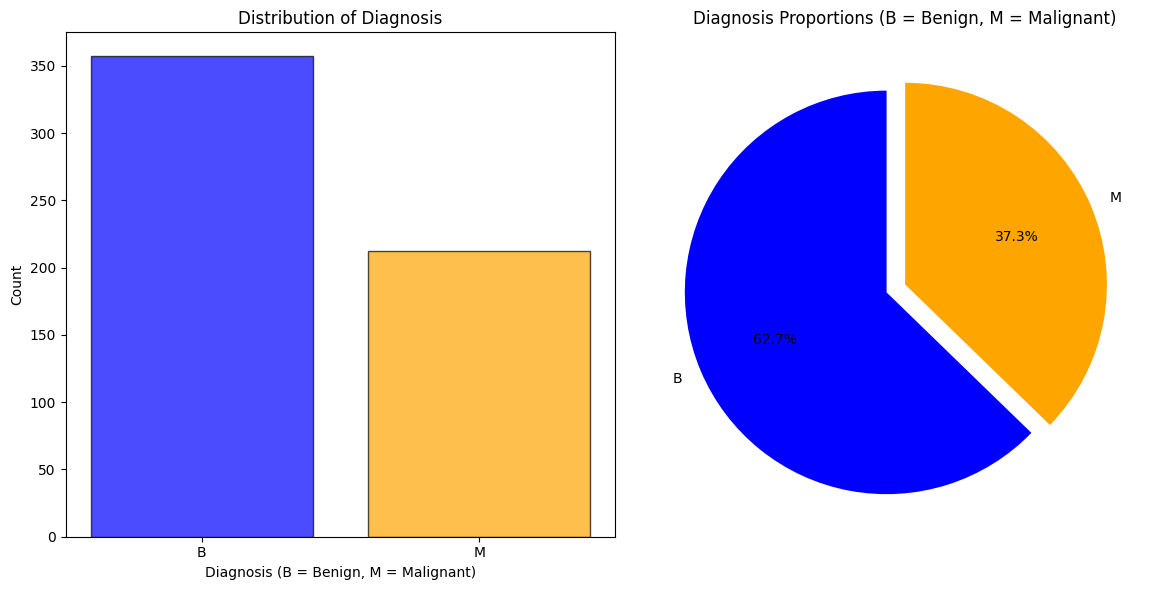

In [11]:
# Diagnosis counts
diagnosis_counts = df['diagnosis'].value_counts()

# Create a figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Bar plot
axes[0].bar(diagnosis_counts.index, diagnosis_counts.values, color=['blue', 'orange'], alpha=0.7, edgecolor='black')
axes[0].set_title('Distribution of Diagnosis')
axes[0].set_xlabel('Diagnosis (B = Benign, M = Malignant)')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=0)

# Pie chart
axes[1].pie(diagnosis_counts, labels=diagnosis_counts.index, autopct='%1.1f%%', colors=['blue', 'orange'], startangle=90, explode=(0.1, 0))
axes[1].set_title('Diagnosis Proportions (B = Benign, M = Malignant)')
axes[1].set_ylabel('')

# Display the plots
plt.tight_layout()
plt.show()

## Distribution of the features

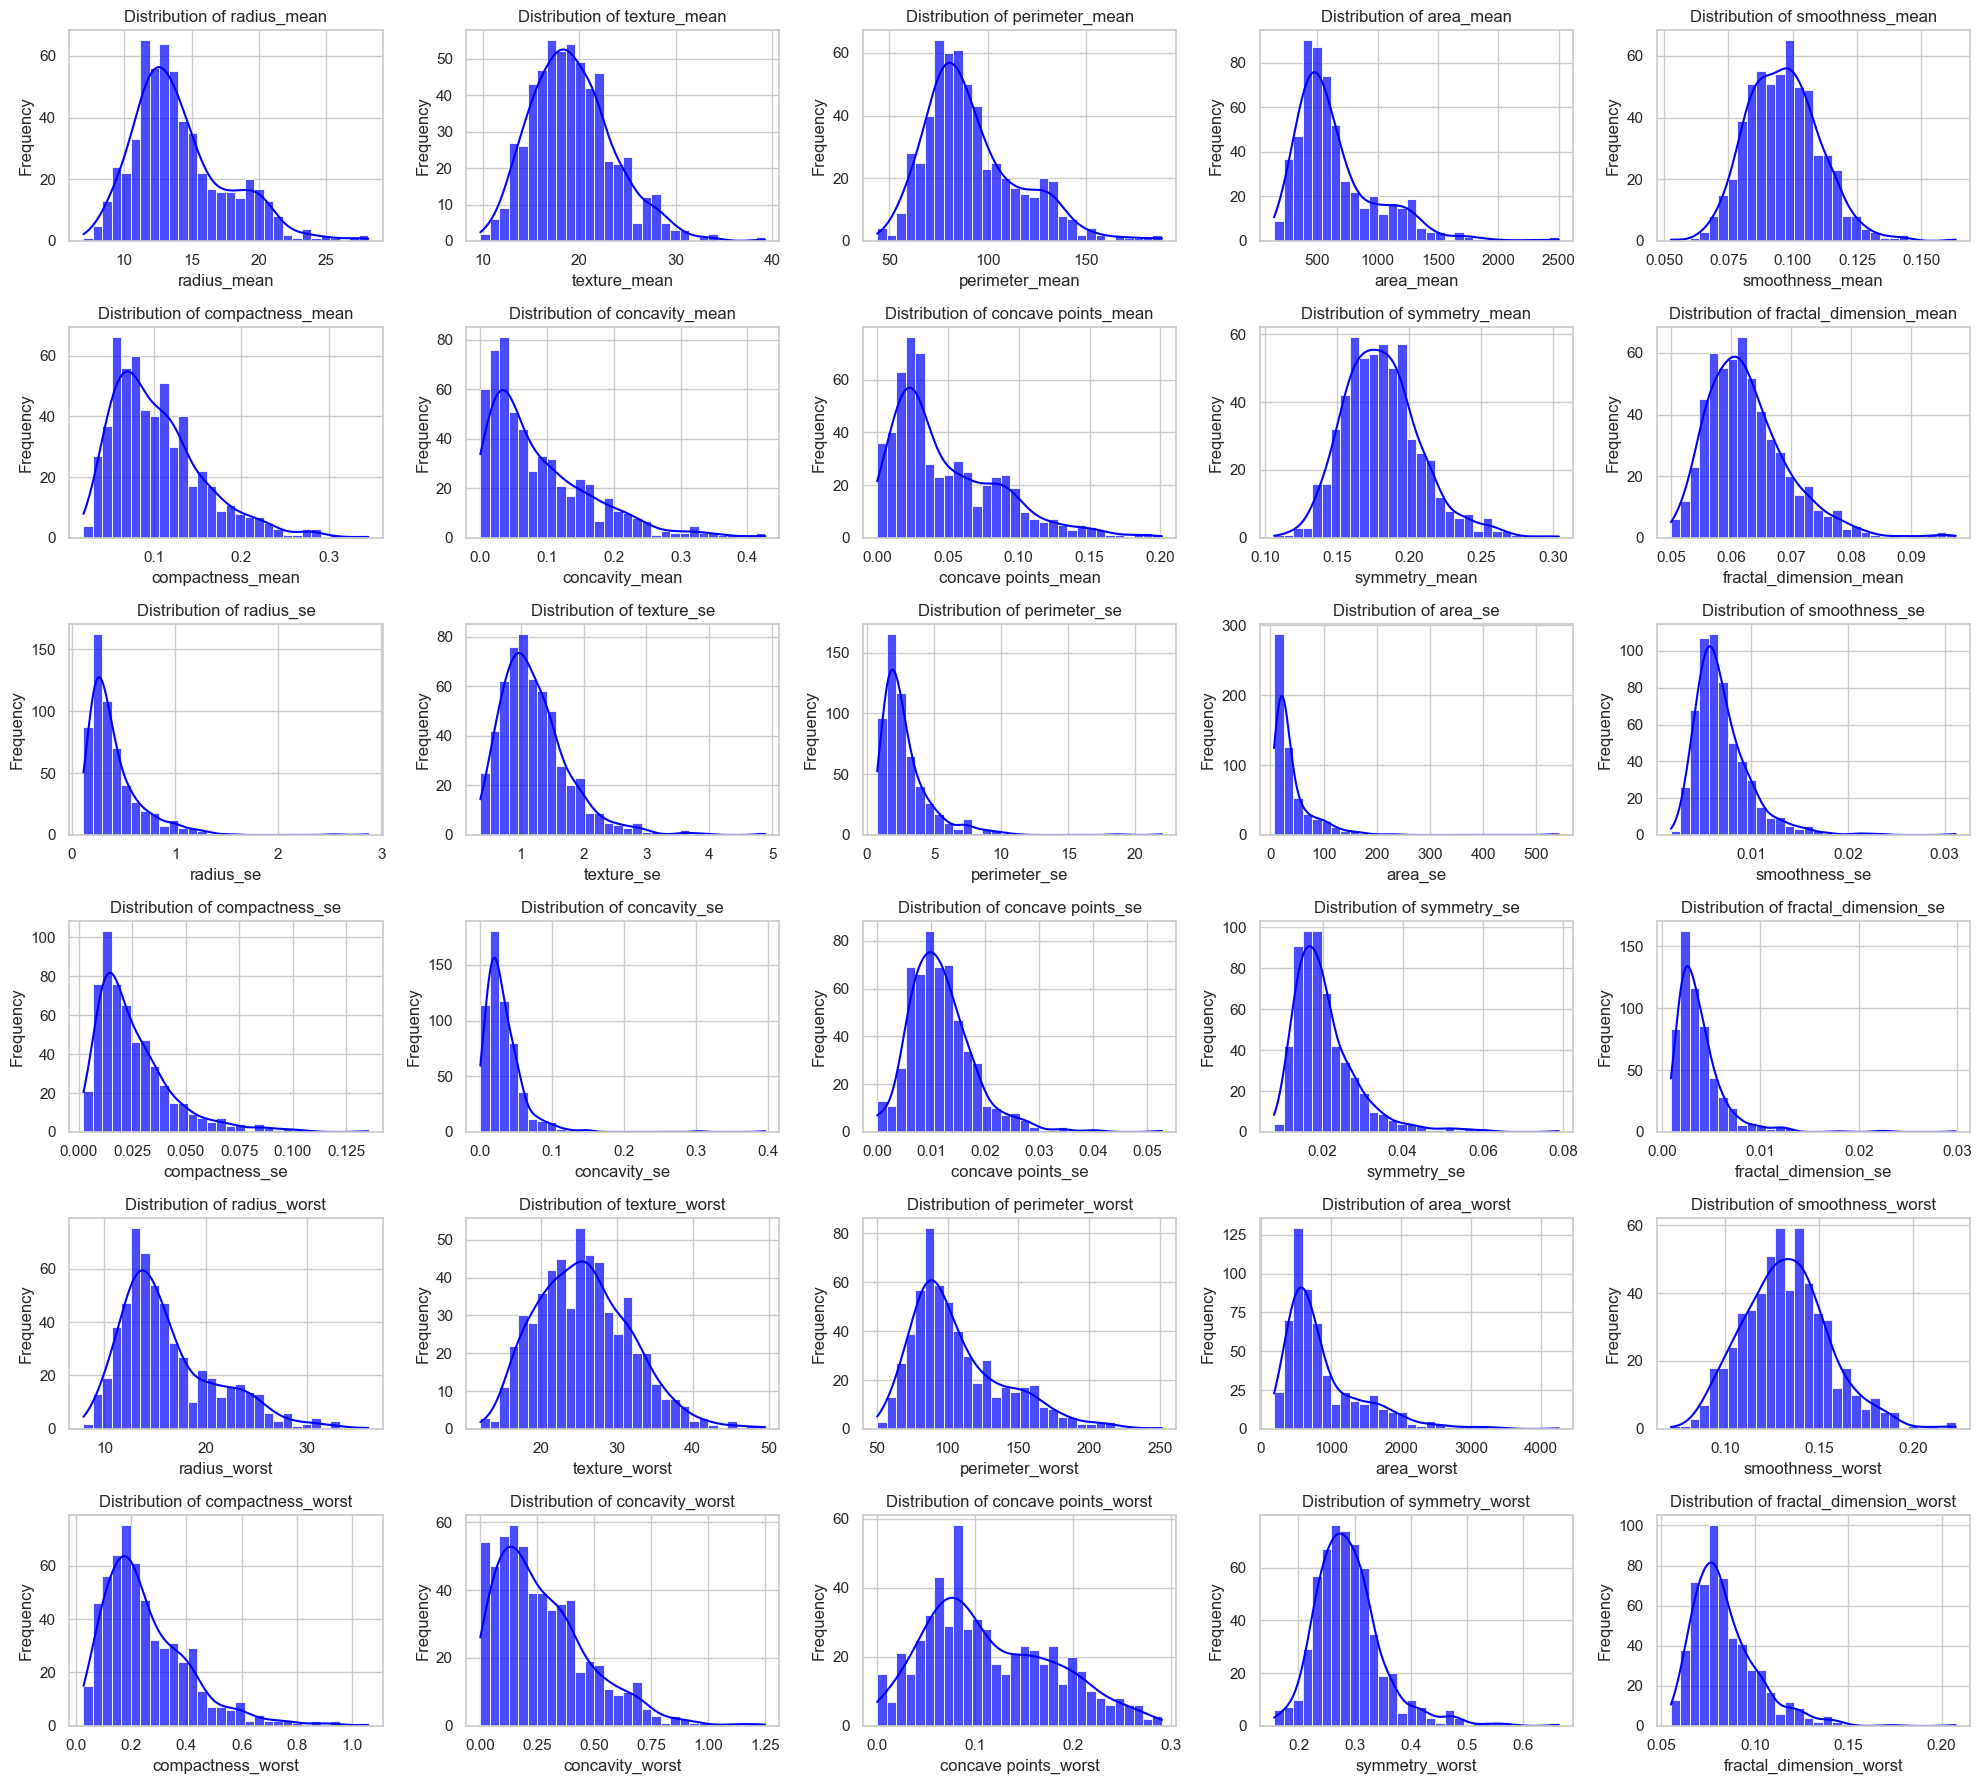

In [12]:
# Ensure consistent style
sns.set_theme(style="whitegrid")

# Get numerical columns
numerical_columns = df.select_dtypes(include=['float64']).columns

# Define the number of rows and columns for the subplot grid
rows = 6
cols = 5

# Create subplots for histograms
fig, axes = plt.subplots(rows, cols, figsize=(20, 18))
axes = axes.flatten()

# Plot histograms for each numerical column
for i, column in enumerate(numerical_columns):
    sns.histplot(df[column], bins=30, kde=True, color='blue', alpha=0.7, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## Density Plot of the features by Diagnosis

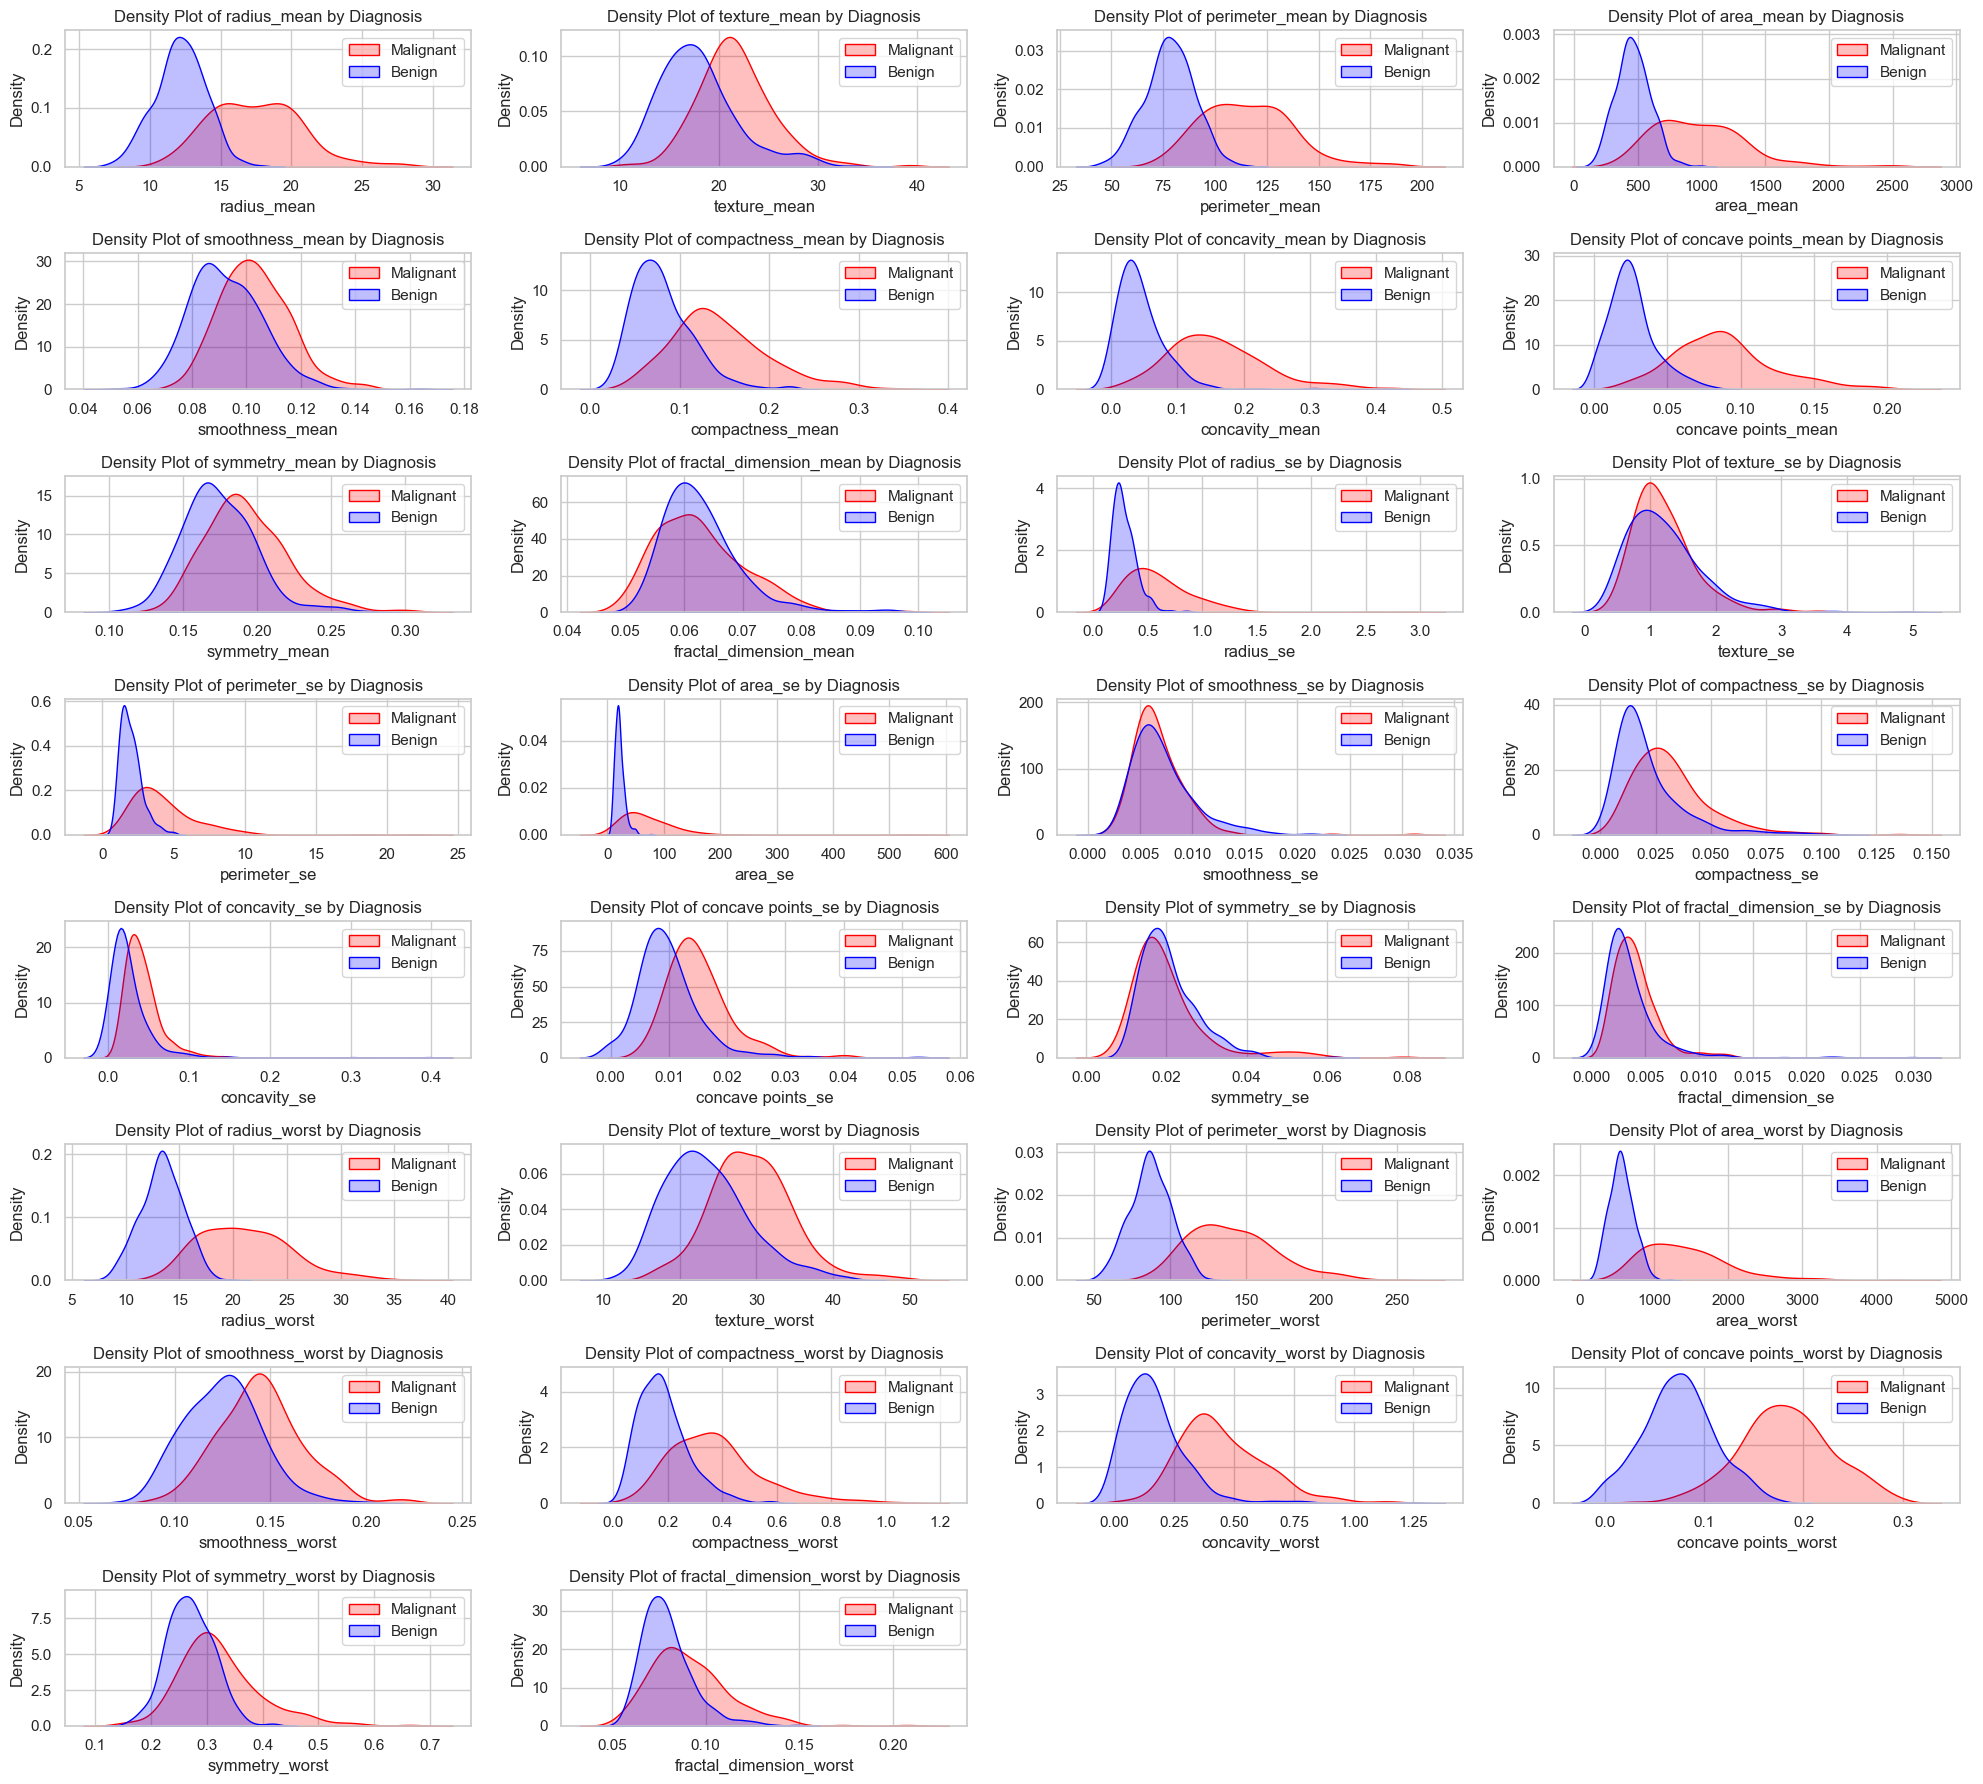

In [13]:
# Define the number of rows and columns for the subplot grid
rows = 8
cols = 4

# Create subplots for density plots
fig, axes = plt.subplots(rows, cols, figsize=(20, 18))
axes = axes.flatten()

# Plot density plots for each numerical column by diagnosis
for i, column in enumerate(numerical_columns):
    # Plot the density for malignant (M) samples
    sns.kdeplot(df[df['diagnosis'] == 'M'][column], fill=True, color='red', label='Malignant', ax=axes[i], warn_singular=False)
    # Plot the density for benign (B) samples
    sns.kdeplot(df[df['diagnosis'] == 'B'][column], fill=True, color='blue', label='Benign', ax=axes[i], warn_singular=False)
    
    # Title, labels, and legend
    axes[i].set_title(f'Density Plot of {column} by Diagnosis')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Density')

    # Get the artists and their labels
    handles, labels = axes[i].get_legend_handles_labels()
    
    # Add a legend if there are handles
    if handles:
        axes[i].legend(handles, labels)

# Hide any extra axes if the number of columns is less than the number of subplots
for i in range(len(numerical_columns), len(axes)):
    axes[i].axis('off')

# Adjust layout to make room for titles and labels
plt.tight_layout()

# Display the plot
plt.show()

## Boxplots grouped by 'diagnosis' column

Boxplots of Features Grouped by Diagnosis:


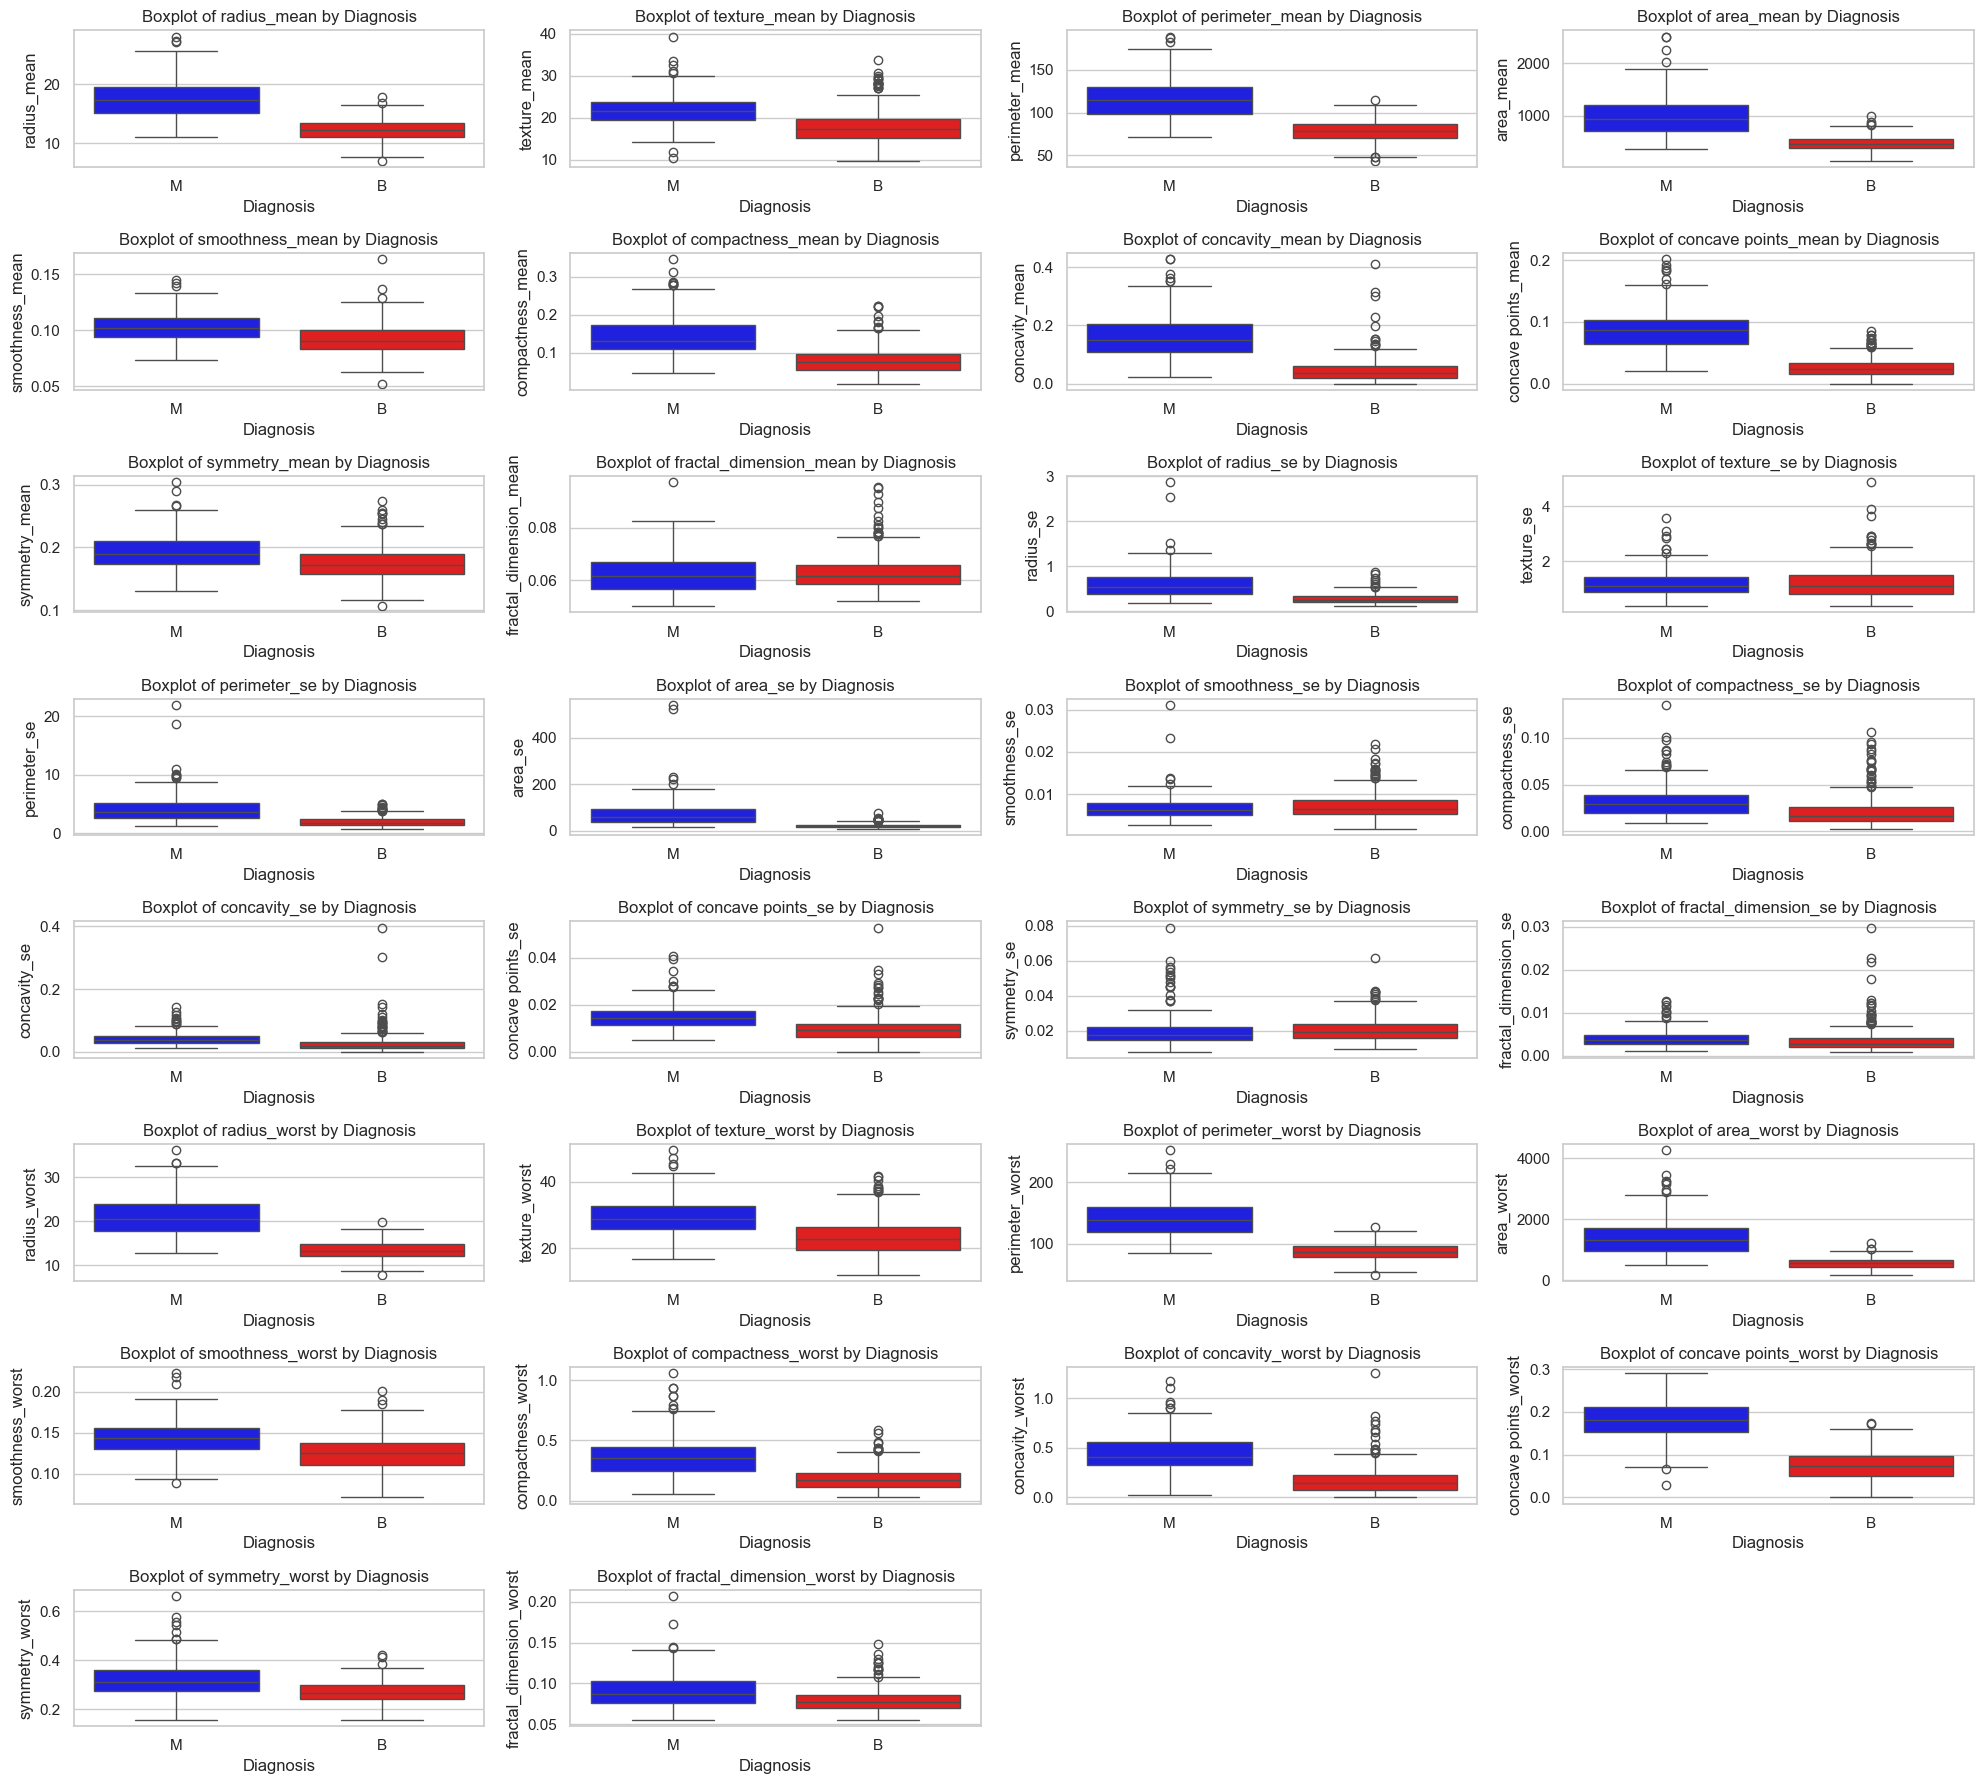

In [14]:
# Create subplots for the boxplots
fig, axes = plt.subplots(rows, cols, figsize=(20, 18))
axes = axes.flatten()

# Plot Boxplots grouped by 'diagnosis'
print("Boxplots of Features Grouped by Diagnosis:")
for i, column in enumerate(numerical_columns):
    if i < len(axes):
        sns.boxplot(x='diagnosis', y=column, data=df, palette=['blue', 'red'], ax=axes[i], hue='diagnosis')

        axes[i].set_title(f'Boxplot of {column} by Diagnosis')
        axes[i].set_xlabel('Diagnosis')
        axes[i].set_ylabel(column)

# Hide any extra axes if the number of columns is less than the number of subplots
for i in range(len(numerical_columns), len(axes)):
    axes[i].axis('off')

# Adjust layout to make room for titles and labels
plt.tight_layout()

# Display the plot
plt.show()

## Heatmap to visualize correlations

Correlation Heatmap:


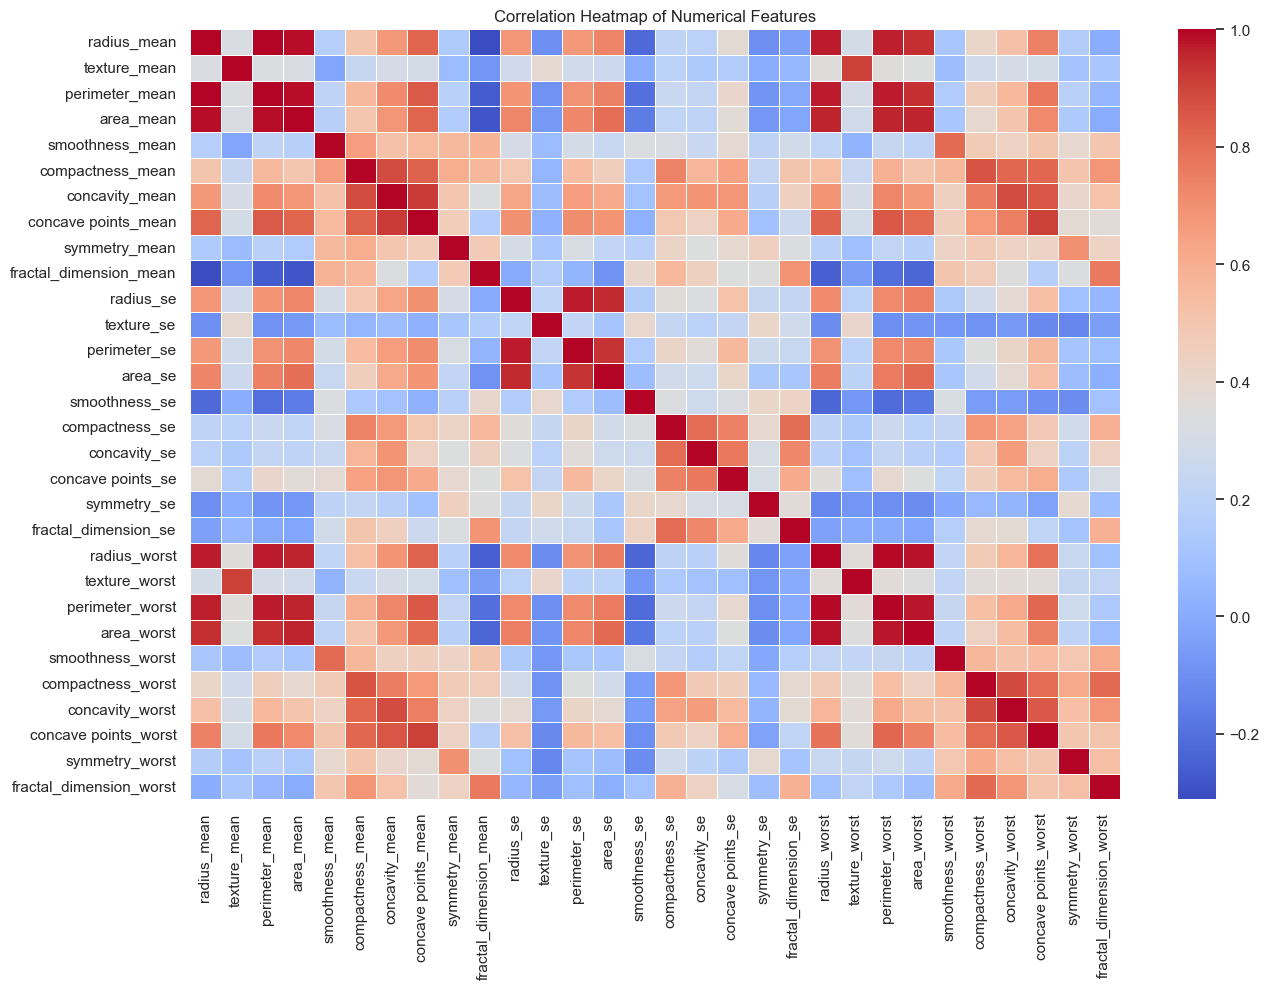

In [15]:
# Calculate correlation matrix for numerical columns
correlation_matrix = df[numerical_columns].corr()

# Heatmap to visualize correlations
print("Correlation Heatmap:")
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

## Scatterplot matrix for pairs of features


Scatterplots for Feature Group 1: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']


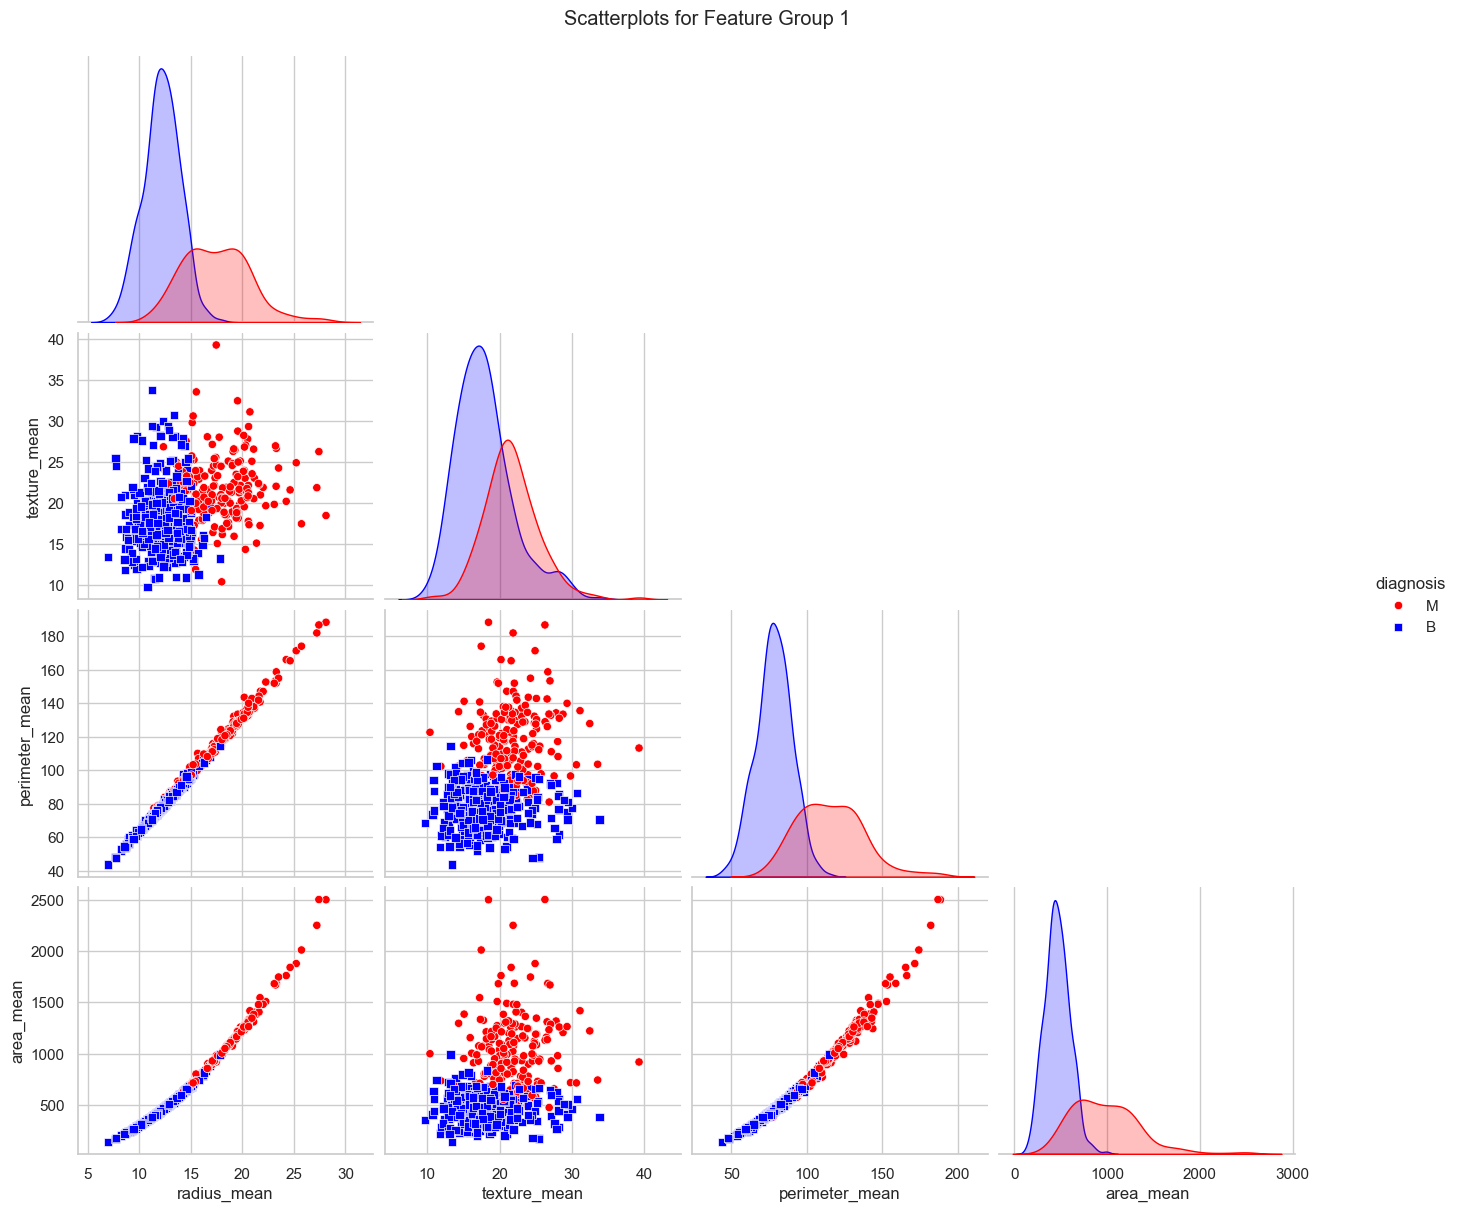


Scatterplots for Feature Group 2: ['smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean']


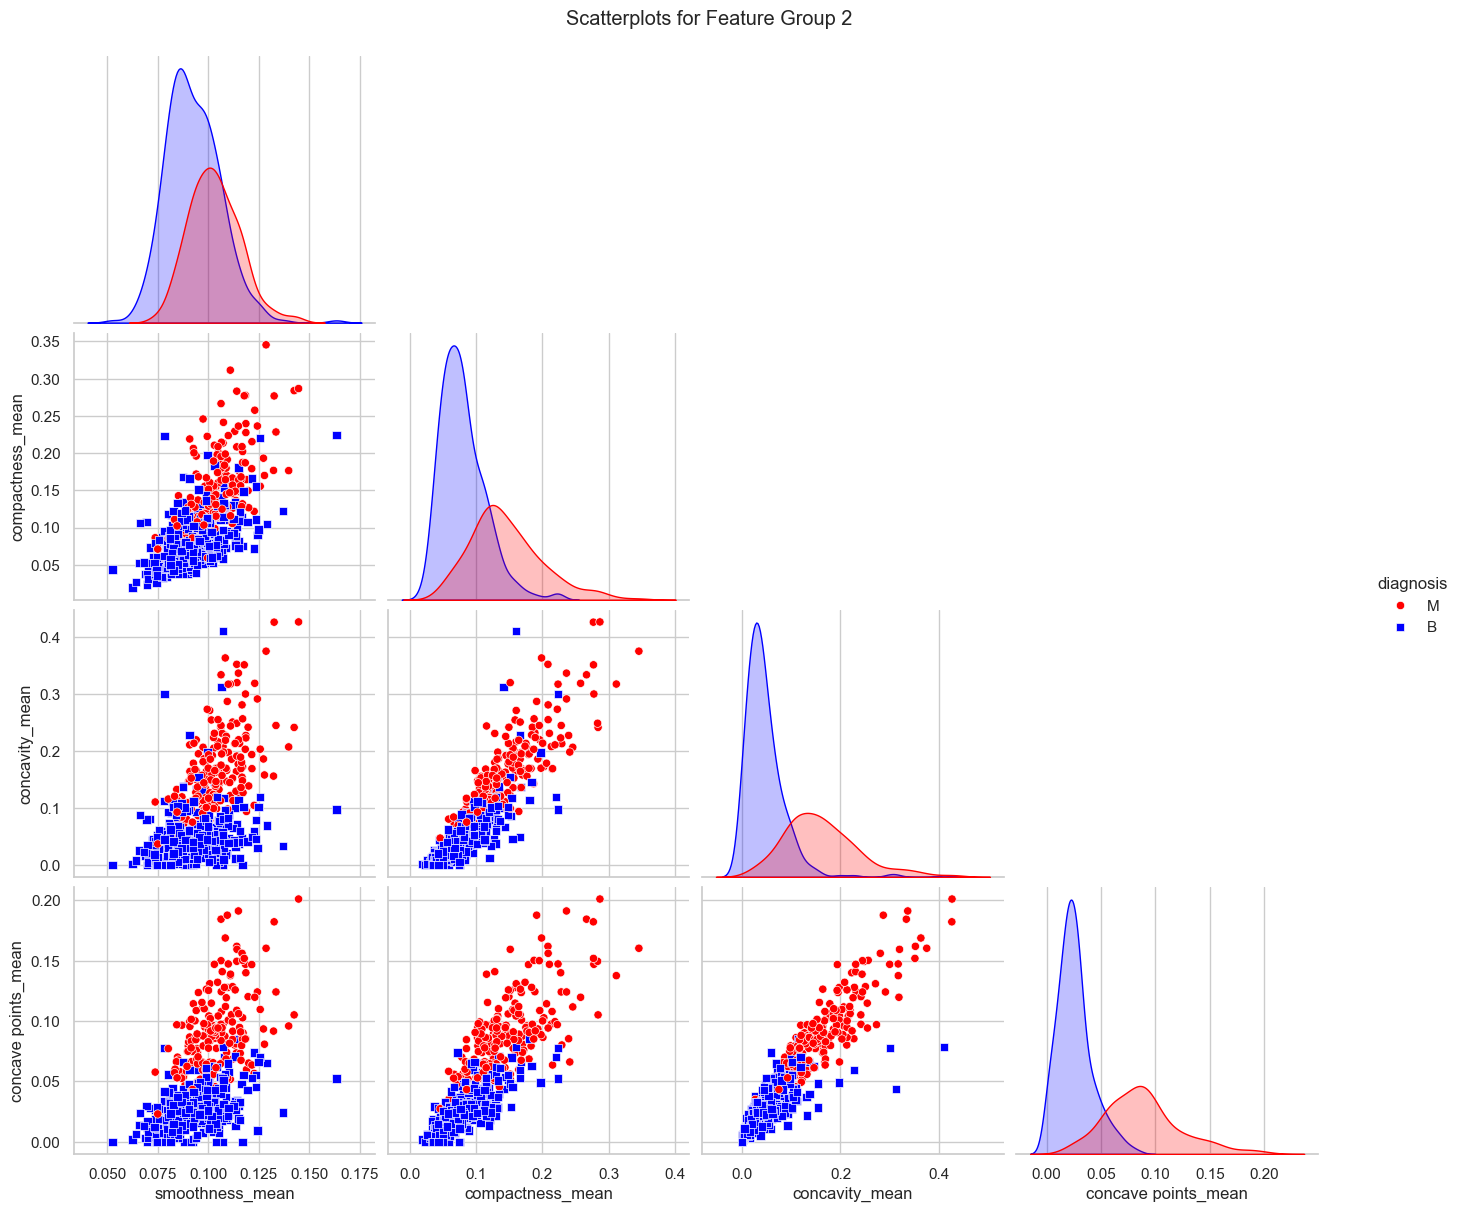


Scatterplots for Feature Group 3: ['symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se']


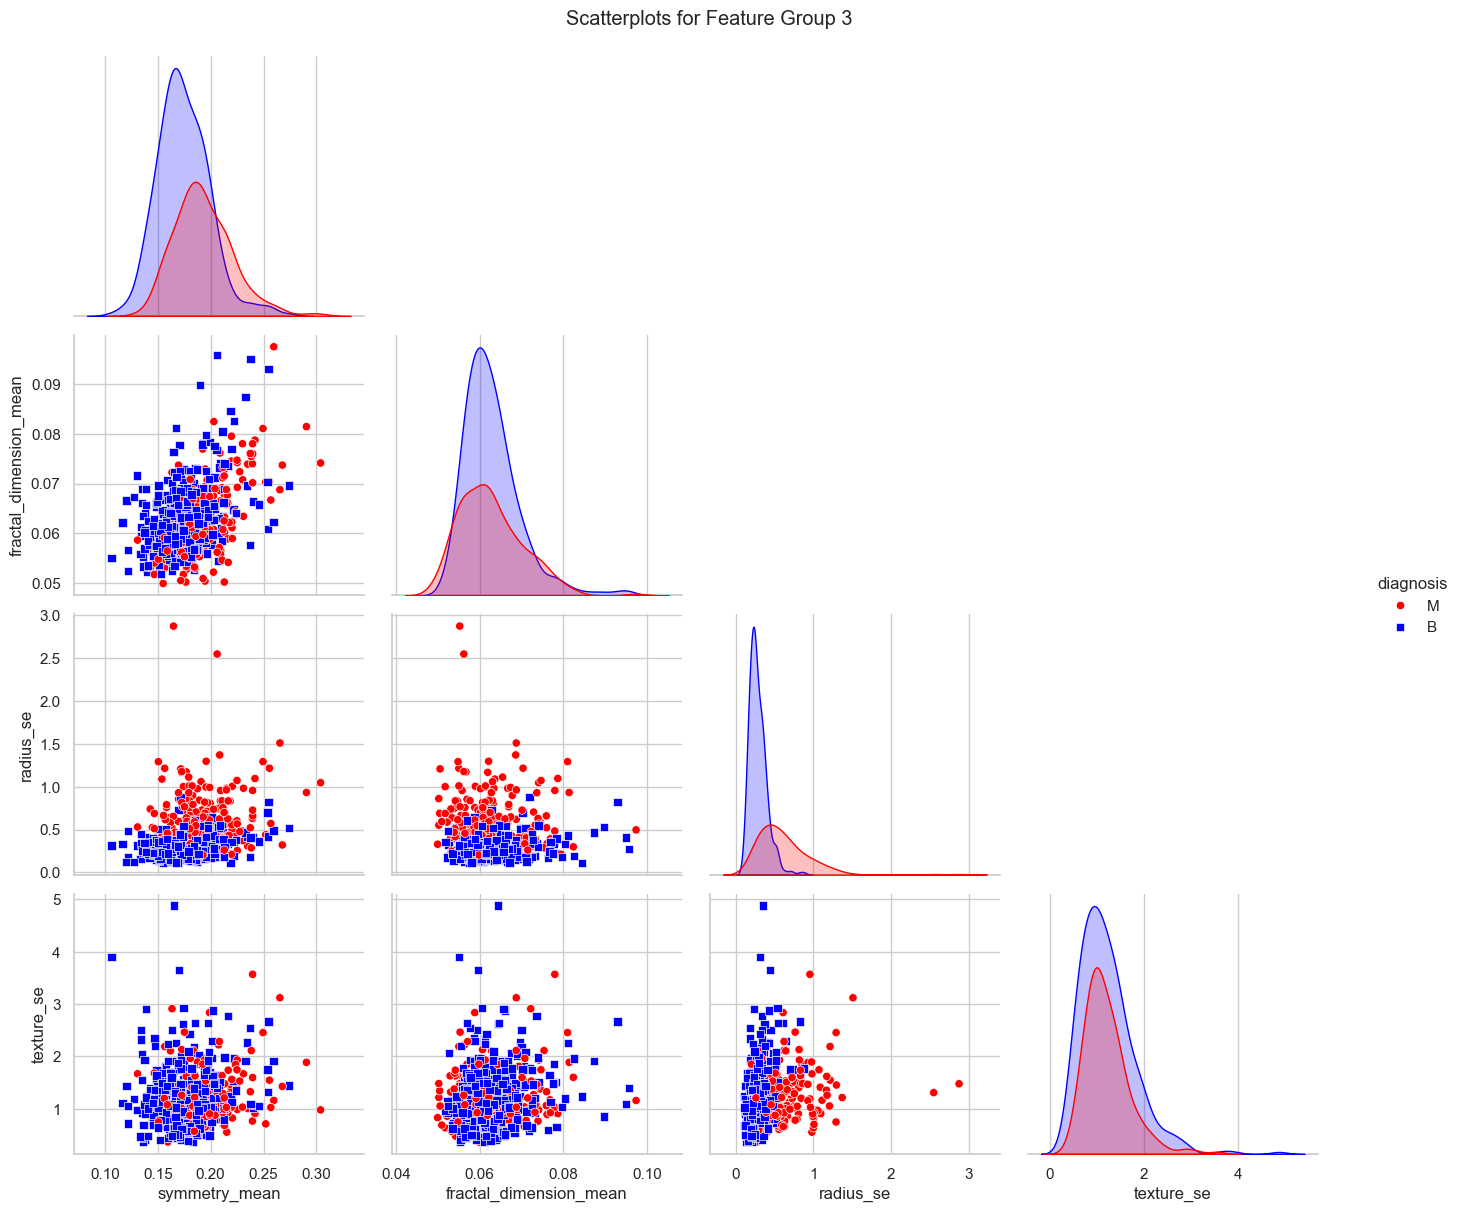


Scatterplots for Feature Group 4: ['perimeter_se', 'area_se', 'smoothness_se', 'compactness_se']


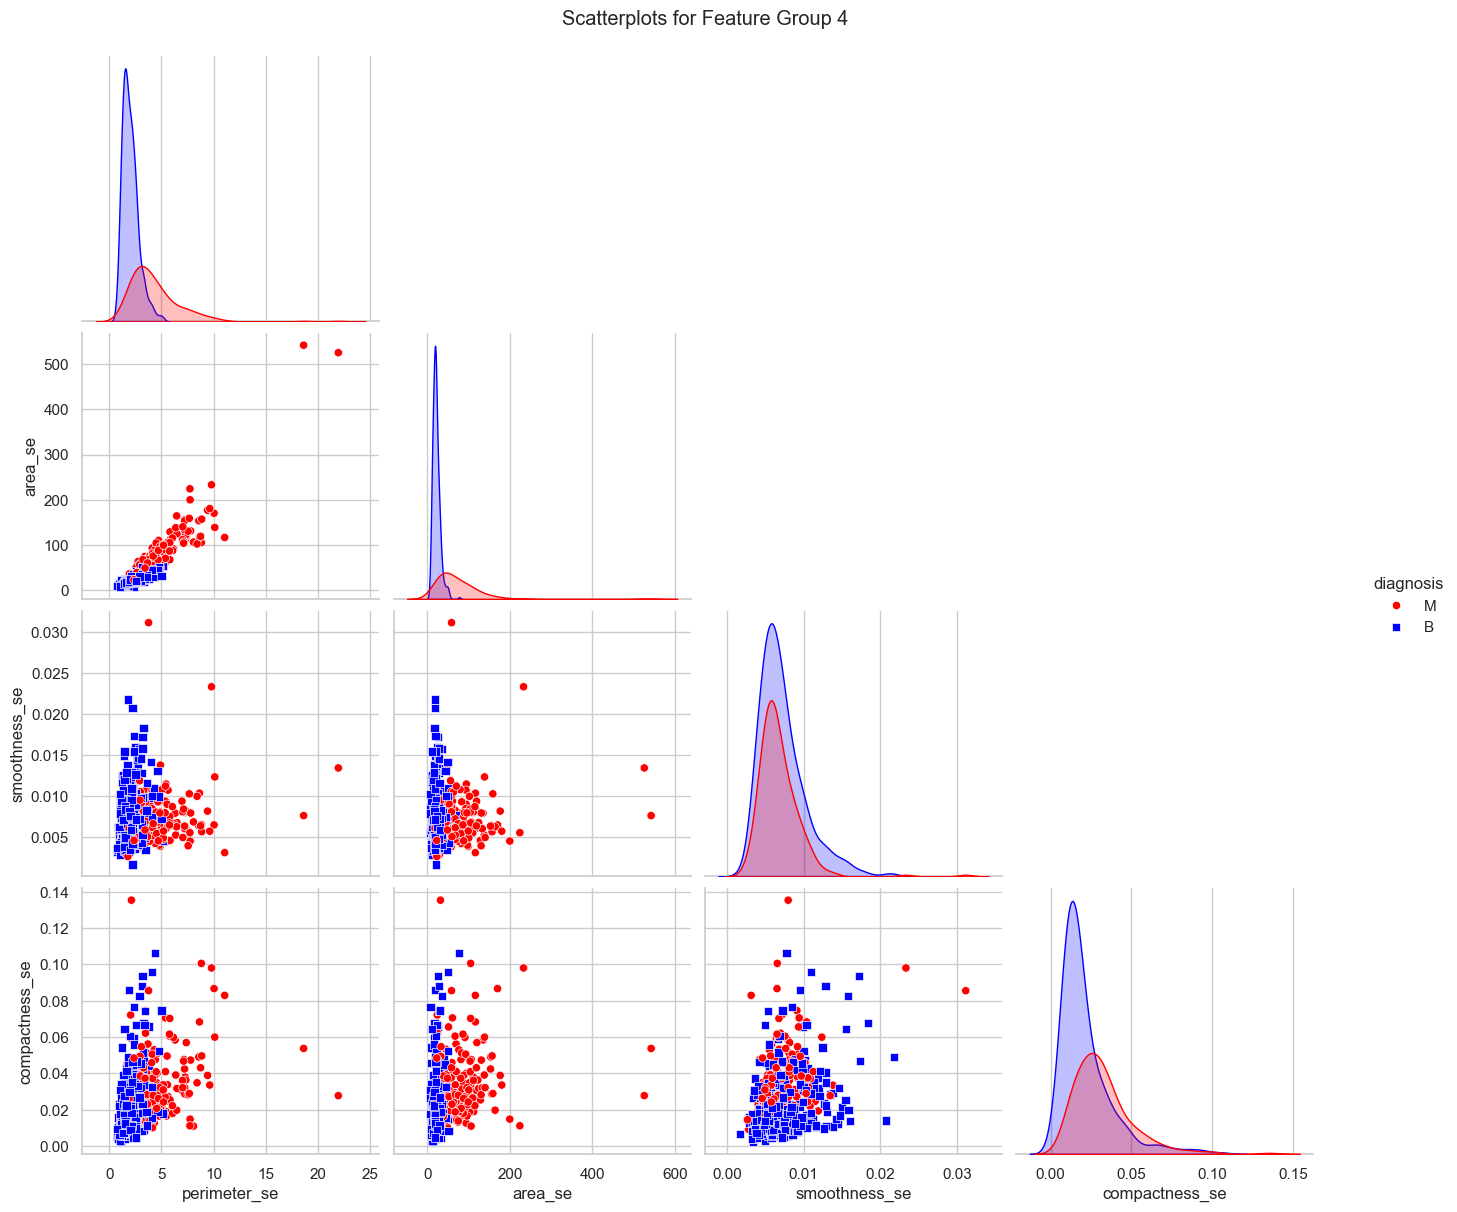


Scatterplots for Feature Group 5: ['concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se']


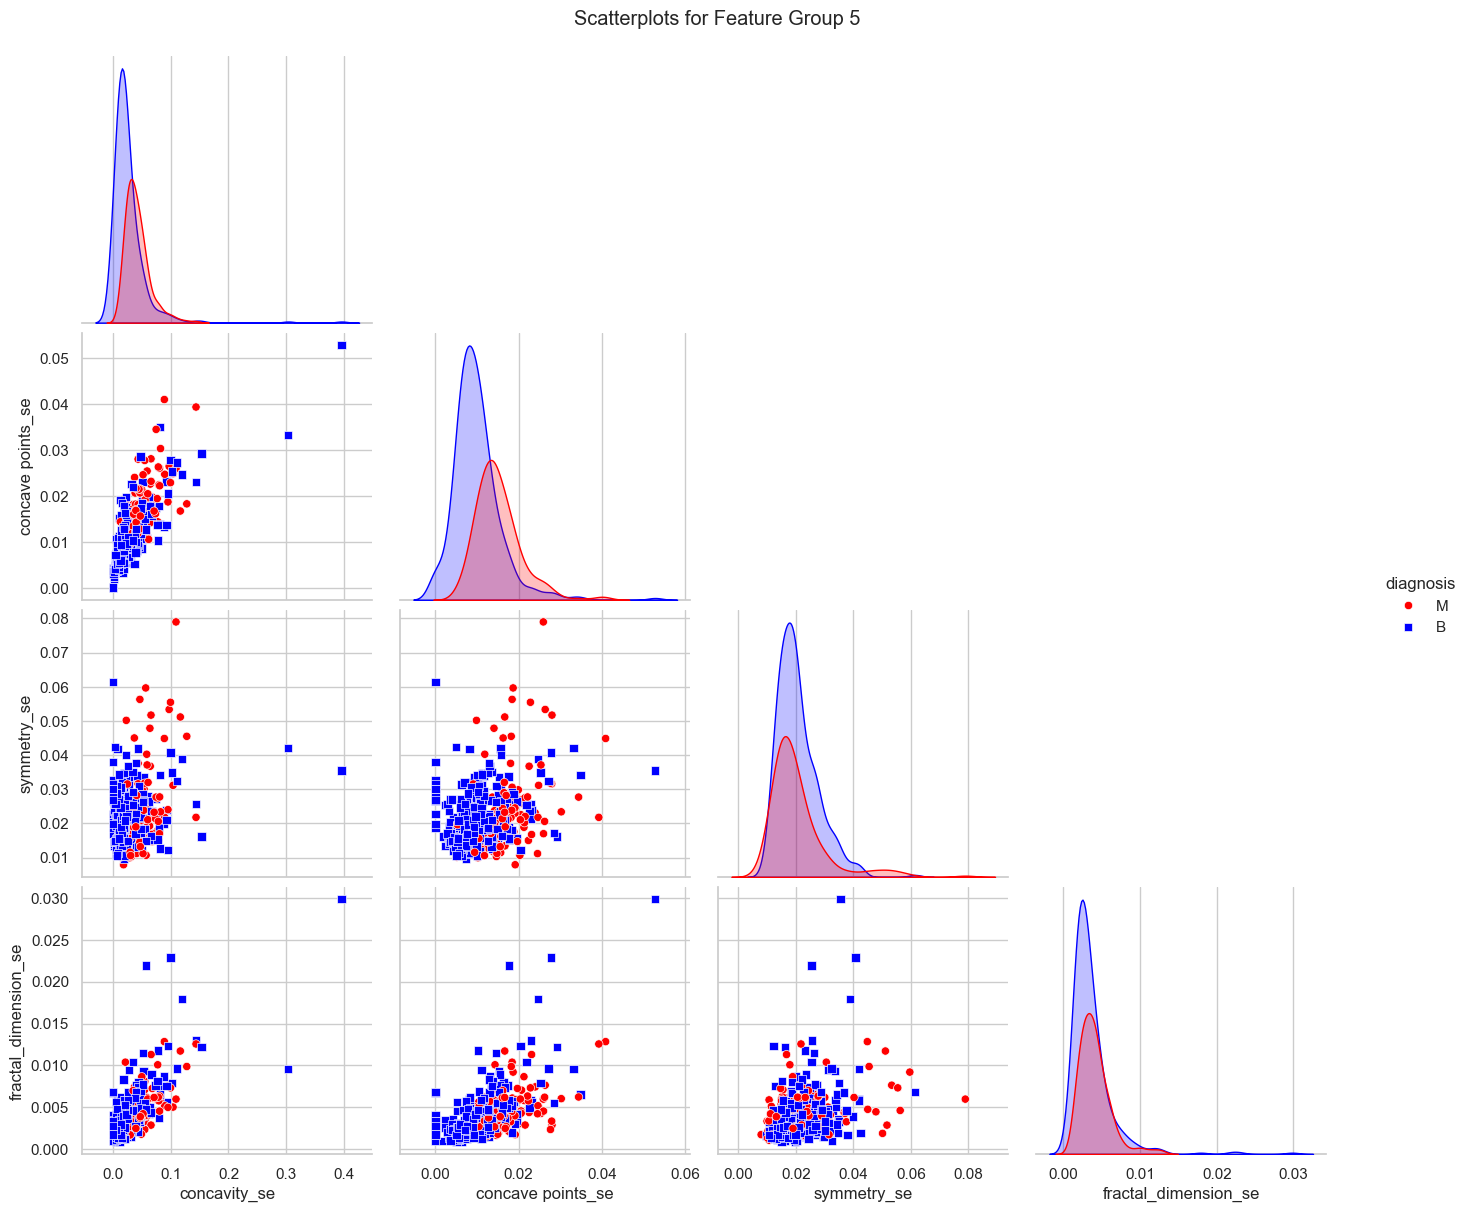


Scatterplots for Feature Group 6: ['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst']


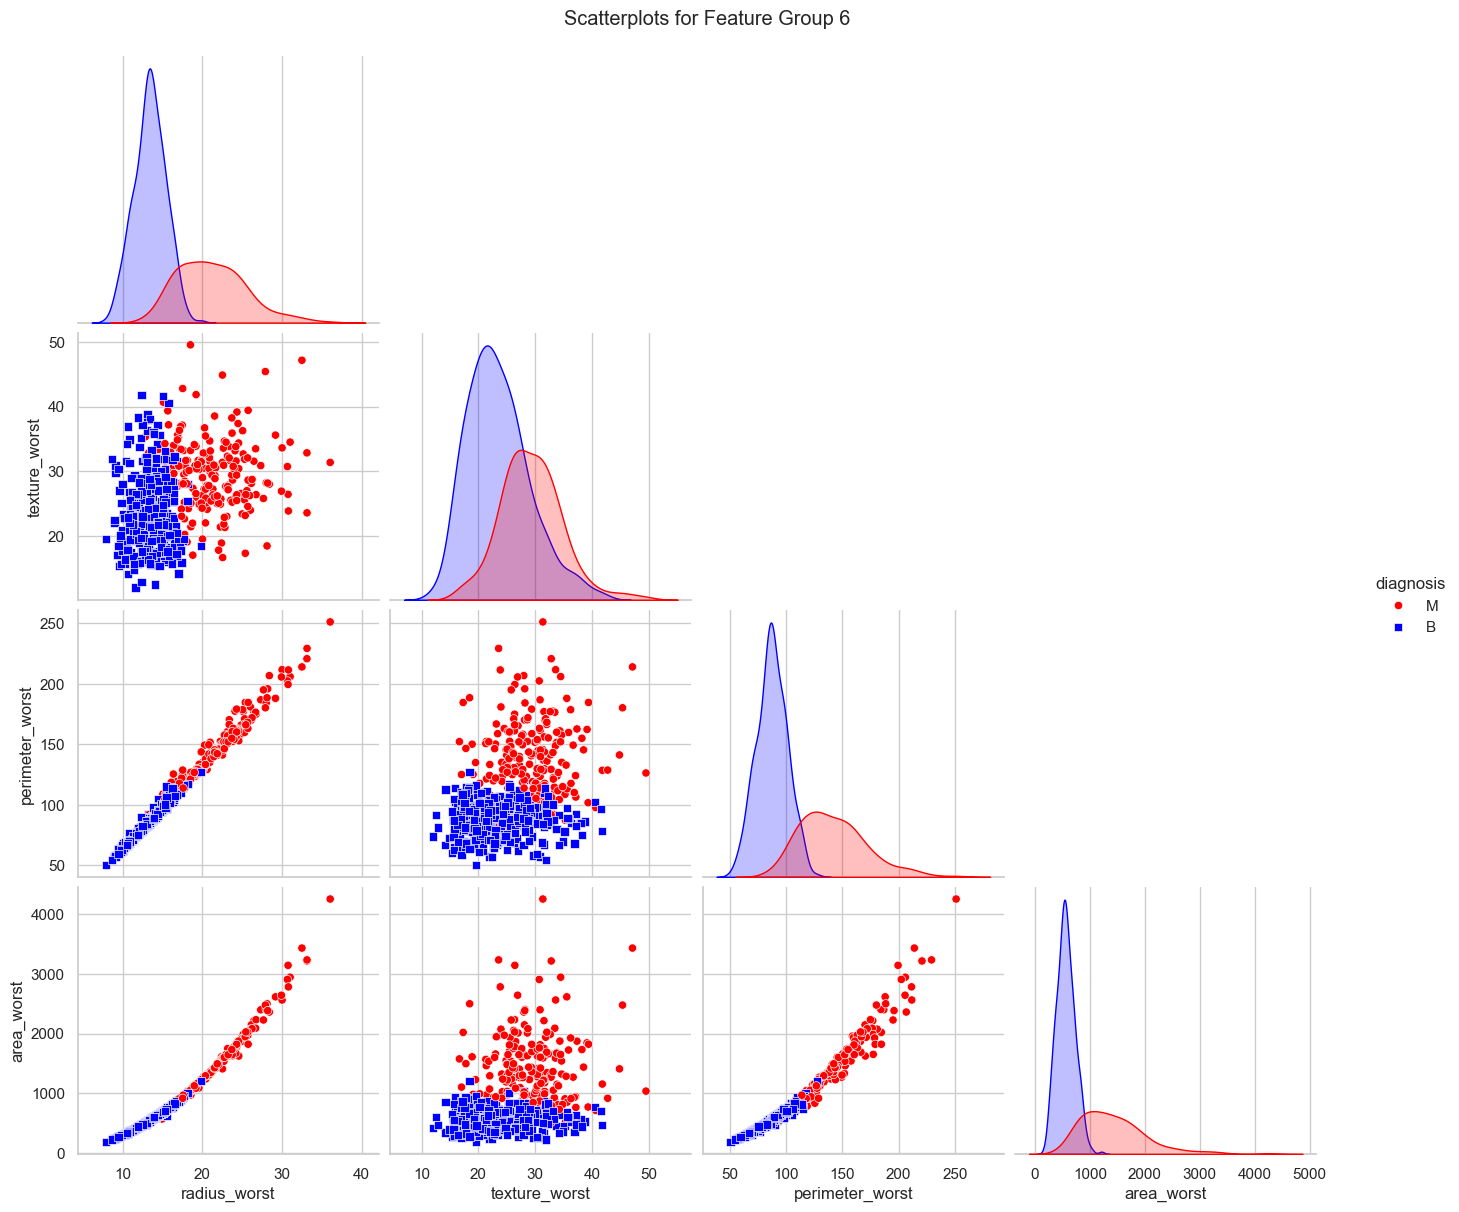


Scatterplots for Feature Group 7: ['smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst']


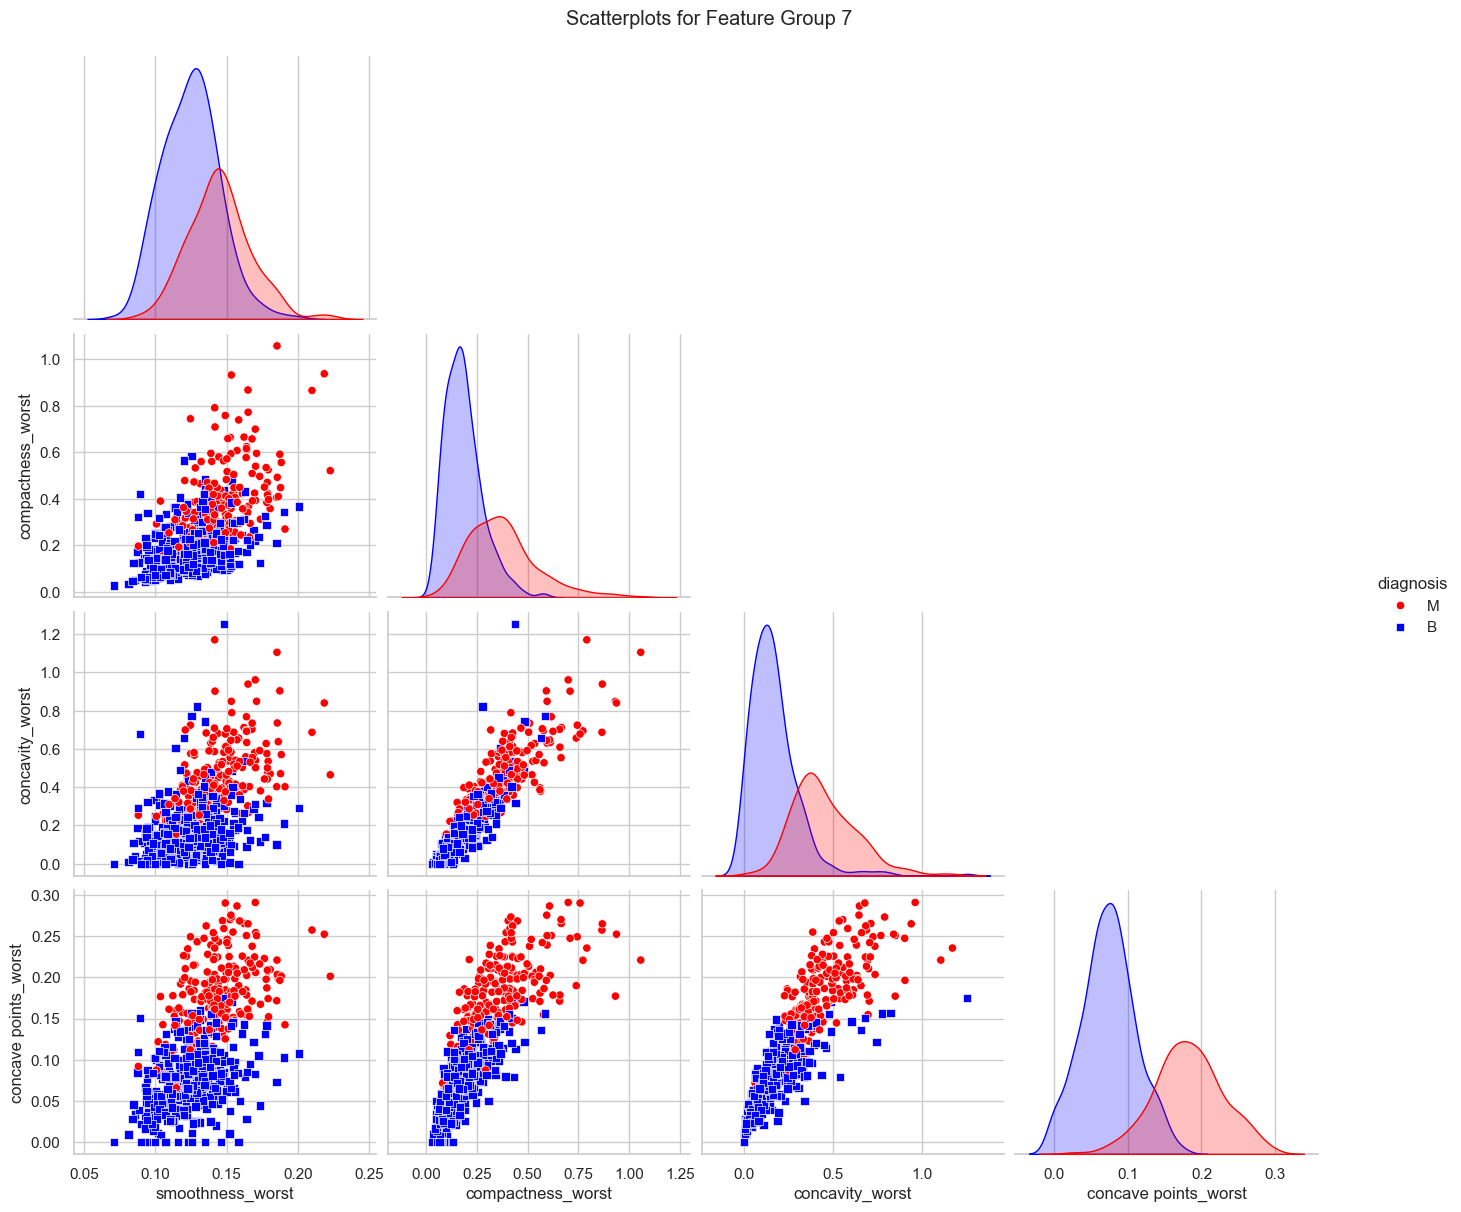

In [16]:
# Feature groups for pair plots
feature_groups = [
    ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean'],
    ['smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean'],
    ['symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se'],
    ['perimeter_se', 'area_se', 'smoothness_se', 'compactness_se'],
    ['concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se'],
    ['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst'],
    ['smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst']
]

# Create pair plots for each group
for i, features in enumerate(feature_groups):
    print(f"\nScatterplots for Feature Group {i + 1}: {features}")
    pair_plot = sns.pairplot(
        df,
        vars=features,
        hue='diagnosis',
        palette={'M': 'red', 'B': 'blue'},
        markers=["o", "s"],
        diag_kind='kde',
        corner=True
    )
    pair_plot.fig.set_size_inches(15, 12)
    plt.suptitle(f'Scatterplots for Feature Group {i + 1}', y=1.02)
    plt.show()

## PCA Visualization

Explained Variance Ratio for the first 3 components: [0.44272026 0.18971182 0.09393163]



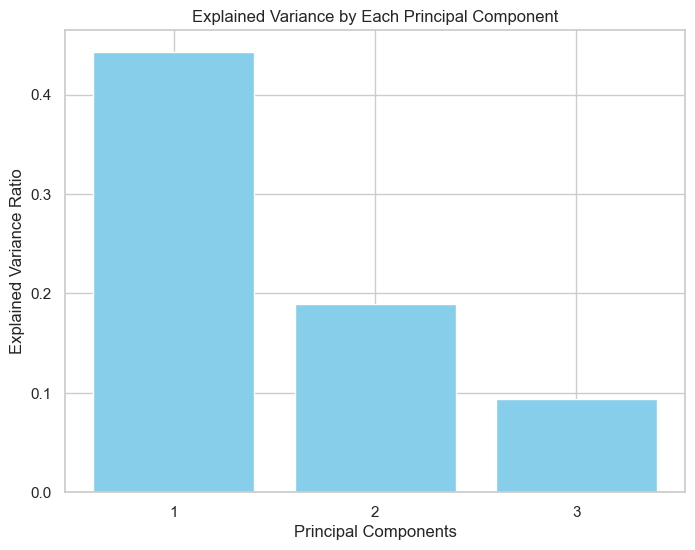

In [17]:
# Extract features and target
X = df.drop(columns=['diagnosis'])
y = df['diagnosis'].map({'M': 1, 'B': 0})

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA to reduce to 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio for the components
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained Variance Ratio for the first 3 components: {explained_variance_ratio}\n")

# Bar plot for variance
plt.figure(figsize=(8, 6))
plt.bar(range(1, 4), explained_variance_ratio, color='skyblue')
plt.title('Explained Variance by Each Principal Component')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks([1,2,3])
plt.show()

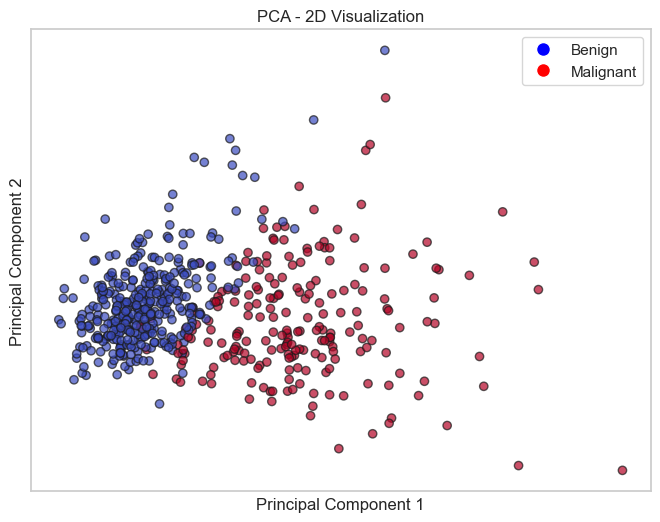

In [18]:
# 2D PCA Visualization
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', edgecolor='k', alpha=0.7)

# legend for Benign (0) and Malignant (1)
legend_labels = [Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Benign'),
                 Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Malignant')]

plt.title('PCA - 2D Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.xticks([])
plt.yticks([])
plt.legend(handles=legend_labels, loc='best')
plt.show()

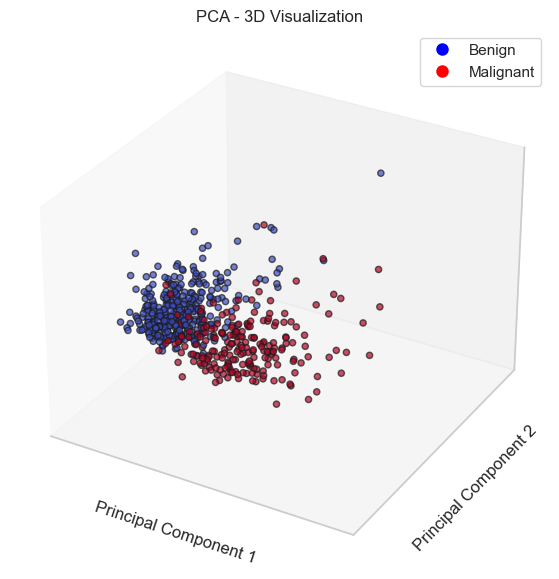

In [19]:
# 3D PCA Visualization
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap='coolwarm', edgecolor='k', alpha=0.7)

ax.set_title('PCA - 3D Visualization')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.legend(handles=legend_labels, loc='best')
plt.show()